<a href="https://colab.research.google.com/github/GOKULAPRASATH17/PROJECTS/blob/main/Emotions_of_EEG_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/references/emotions.csv")

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/references/synthetic_ecg_with_emotions.csv")

In [ ]:
df1.shape

(2132, 3)

In [ ]:
label=df["label"]

In [ ]:
df.drop("label",axis=1,inplace=True)

In [ ]:
df["ECG"]=df1["ECG"]

In [ ]:
df.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
ECG           0
Length: 2549, dtype: int64

In [ ]:
df["label"]=label

In [ ]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,ECG,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,60.014090,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,60.410173,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,60.239148,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,61.047481,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,61.273060,NEUTRAL


In [ ]:
df.to_csv("Emotions_of_EEG_ECG.csv")

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Emotions_of_EEG_ECG.csv")

In [ ]:
df.head()

,Unnamed: 0,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,...,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,ECG,label
0,0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,...,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,60.014090,NEGATIVE
1,1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,...,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,60.410173,NEUTRAL
2,2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,...,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,60.239148,POSITIVE
3,3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,...,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,61.047481,POSITIVE
4,4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,...,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,61.273060,NEUTRAL


In [ ]:
df.shape

(2132, 2551)

In [ ]:
pos=df.loc[df["label"]=="POSITIVE"]
sample_pos=pos.loc[2,'fft_0_b':'fft_749_b']
print(pos.shape,sample_pos.shape)

(708, 2551) (750,)


In [ ]:
neg = df.loc[df["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
print(neg.shape,sample_neg.shape)

(708, 2551) (750,)


In [ ]:
neu = df.loc[df["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']
print(neu.shape,sample_neu.shape)

(716, 2551) (750,)


<ipython-input-23-0e47febe422b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df,palette=["red","blue","yellow"])


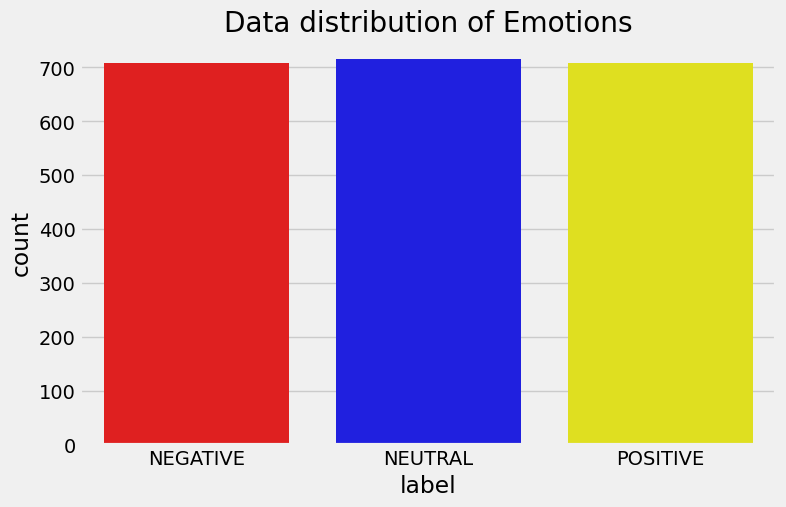

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=df,palette=["red","blue","yellow"])
plt.show()

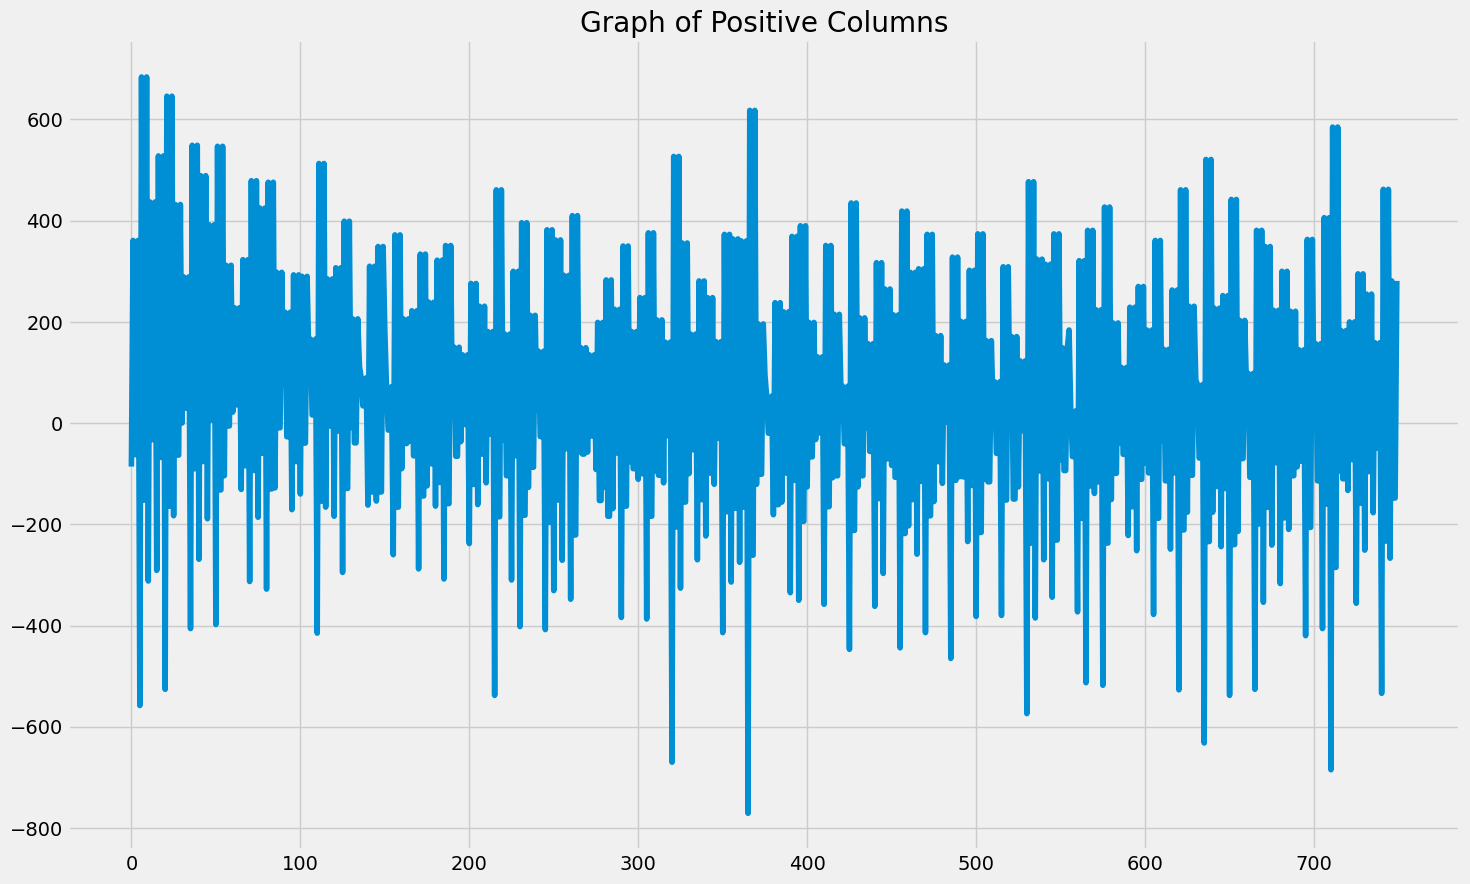

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

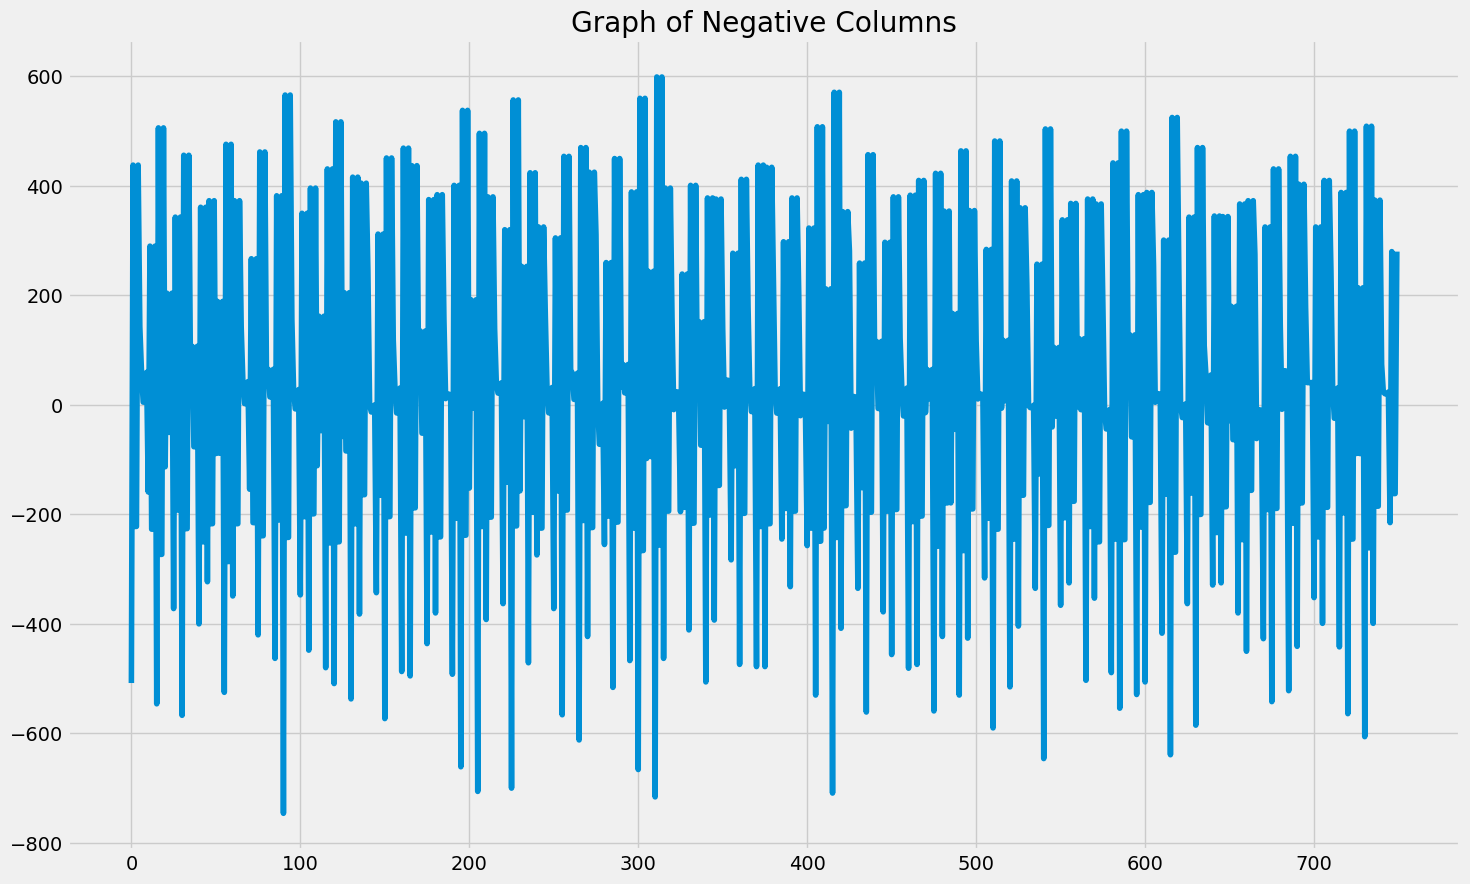

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

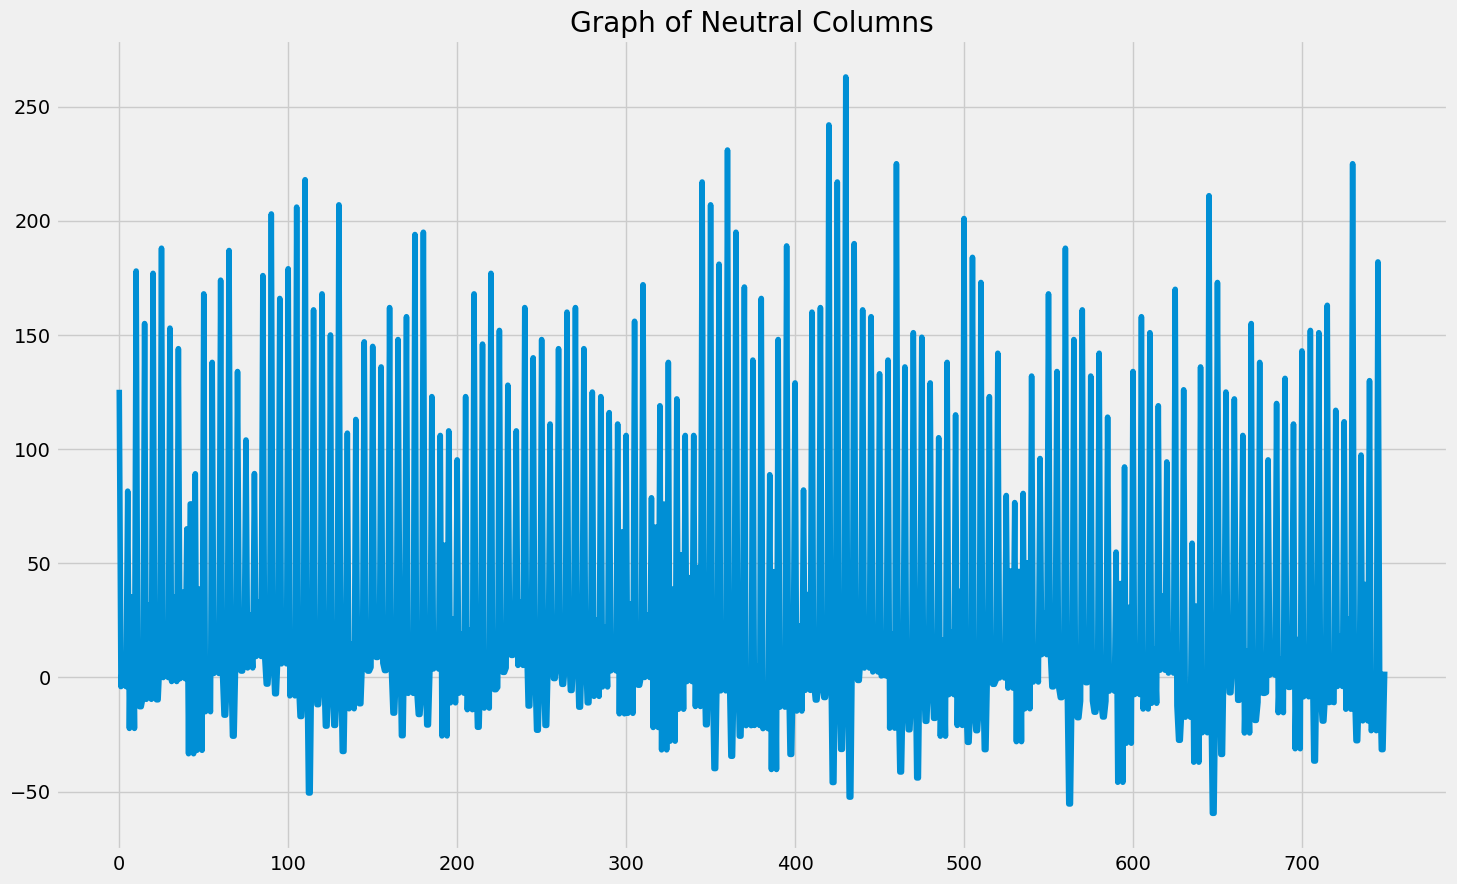

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#logistic Regression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Logistic=accuracy_score(y_test,y_pred)

In [ ]:
#Random Forest
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Random=accuracy_score(y_test,y_pred)

In [ ]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Decision=accuracy_score(y_test,y_pred)

In [ ]:
#Support Vector Machine
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Support=accuracy_score(y_test,y_pred)

In [ ]:
#KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
knn=accuracy_score(y_test,y_pred)

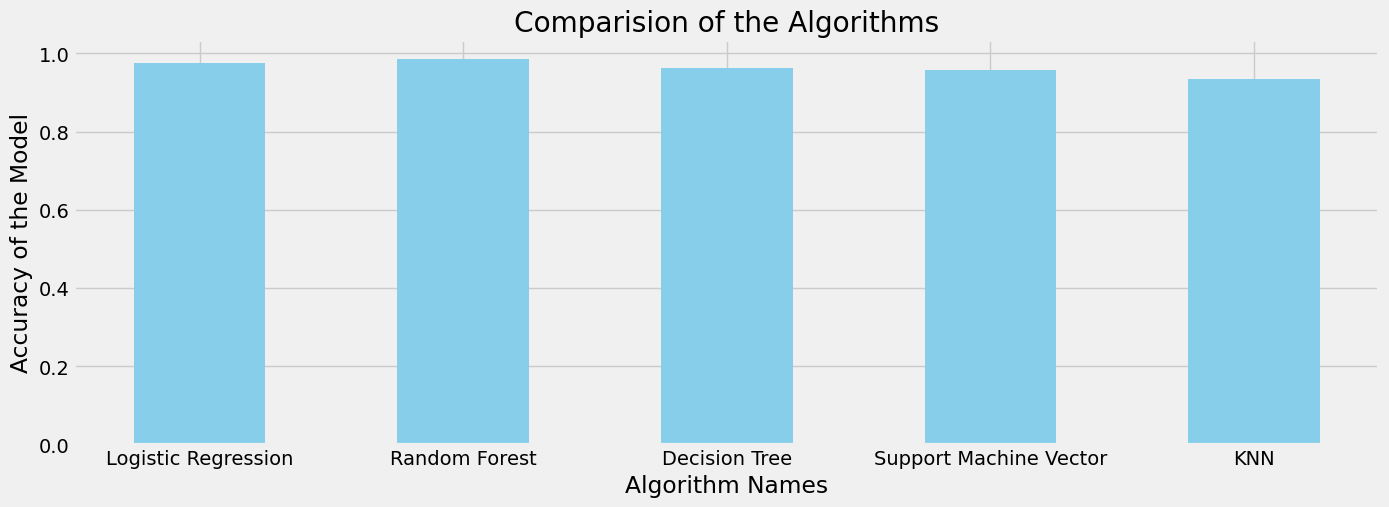

In [ ]:
fig = plt.figure(figsize = (15, 5))
plt.bar(["Logistic Regression","Random Forest","Decision Tree","Support Machine Vector","KNN"],[Logistic,Random,Decision,Support,knn],color='skyblue',width=0.5)
plt.xlabel("Algorithm Names")
plt.ylabel("Accuracy of the Model")
plt.title("Comparision of the Algorithms")
plt.show()

In [ ]:
print(Logistic,Random,Decision,Support,knn)

0.9765807962529274 0.9859484777517564 0.9625292740046838 0.9578454332552693 0.9344262295081968
